# TRAINING CLASSIFIERS
Pouzijeme preprocessing na datach z nasho feature engeneering. Takisto vyskusam SFFS pri KNN klasifikatore

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import accuracy_score

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 10)
from IPython.display import Image, SVG, display

In [2]:
def import_data(name):
        return pd.read_csv('../data/'+ name +'.csv', header=None)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
x_train = import_data('x_train')
y_train = import_data('y_train')
x_val = import_data('x_validation')
y_val = import_data('y_validation')
x_test = import_data('x_test')

In [5]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaler.transform(x_train)
scaler.transform(x_val)
scaler.transform(x_test)

array([[ 0.68175786, -1.04127011,  0.29667494, ...,  0.46257261,
        -1.16489198,  1.50973193],
       [-1.0184001 , -1.19653919,  0.67990464, ..., -0.78882241,
         0.36220753,  0.24500916],
       [-0.34250901, -0.24978444,  0.53025689, ..., -0.52701254,
         0.65633797,  0.12388937],
       ..., 
       [ 0.4573613 , -0.43761255,  0.58521471, ..., -0.08127109,
        -0.77023686,  1.71760862],
       [-0.85417947, -1.72119813, -0.56222144, ..., -0.19664121,
        -0.28221329,  0.25296975],
       [-1.13963296,  0.8683575 , -0.62867476, ..., -0.33596266,
         0.35007418, -0.07479598]])

In [7]:
x_t = x_train.as_matrix().astype(np.float)
#y_t = y_train.as_matrix().astype(np.float)
x_v = x_val.as_matrix().astype(np.float)
#y_v = y_val.as_matrix().astype(np.float)
test = x_test.as_matrix().astype(np.float)
x_t.shape

(100000, 32)

Pridanie nasej vytvorenej featury z feature engeneering

In [8]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,-1.278341,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-3.672226,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-5.564399,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,3.240573,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,-0.639724,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027


In [9]:
x_t = x_train.as_matrix().astype(np.float)
y_t = y_train.as_matrix().astype(np.float)
x_v = x_val.as_matrix().astype(np.float)
y_v = y_val.as_matrix().astype(np.float)
test = x_test.as_matrix().astype(np.float)
x_t.shape

(100000, 32)

### KNN classifier with SFFS

In [13]:
y_t = y_t.reshape(100000,)
y_v = y_v.reshape(20000,)
y_v

array([ 1.,  1.,  1., ...,  0.,  1.,  0.])

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

sffs = SFS(knn, 
           k_features=10, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(x_t, y_t)

print('\nSequential Forward Floating Selection (k=5):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)


Sequential Forward Floating Selection (k=5):
(2, 6, 7, 9, 12, 16, 21, 22, 23, 32)
CV Score:
0.757999959808


In [28]:
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,0.56187,0.00189786,"[0.563777448902, 0.56084, 0.56092, 0.561942477...","(32,)",0.00118396,0.000683558
2,0.62657,0.00327302,"[0.629854805808, 0.62424, 0.62612, 0.626065042...","(16, 32)",0.00204183,0.00117885
3,0.67025,0.00584888,"[0.671333146674, 0.6642, 0.67148, 0.673986959478]","(2, 16, 32)",0.00364875,0.00210661
4,0.69286,0.00480742,"[0.696292148314, 0.68804, 0.69352, 0.69358774351]","(2, 16, 21, 32)",0.00299905,0.0017315
5,0.71832,0.00317841,"[0.717771289148, 0.71552, 0.719, 0.720988839554]","(2, 7, 16, 21, 32)",0.00198281,0.00114478
6,0.73484,0.00431528,"[0.735570577177, 0.73028, 0.73716, 0.736349453...","(2, 7, 12, 16, 21, 32)",0.00269203,0.00155425
7,0.74578,0.0038026,"[0.748690052398, 0.74216, 0.74672, 0.745549821...","(2, 7, 12, 16, 21, 22, 32)",0.0023722,0.00136959
8,0.75067,0.00416618,"[0.753769849206, 0.74688, 0.7522, 0.7498299932]","(2, 6, 7, 12, 16, 21, 22, 32)",0.00259902,0.00150055
9,0.7548,0.00370847,"[0.758329666813, 0.75188, 0.75484, 0.754150166...","(2, 6, 7, 9, 12, 16, 21, 22, 32)",0.00231348,0.00133569
10,0.758,0.00526535,"[0.76252949882, 0.75328, 0.75768, 0.758510340414]","(2, 6, 7, 9, 12, 16, 21, 22, 23, 32)",0.00328472,0.00189644


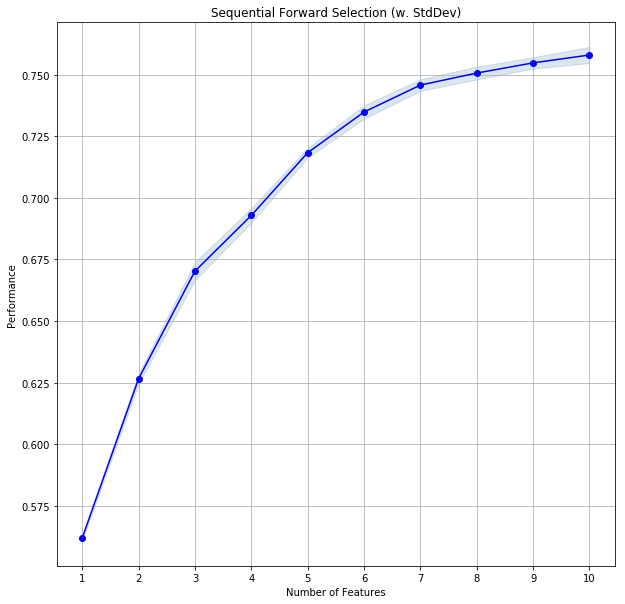

In [29]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [31]:
X_train_sfs = sffs.transform(x_t)
X_test_sfs = sffs.transform(x_v)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_sfs, y_t)
y_pred = knn.predict(X_test_sfs)

# Compute the accuracy of the prediction
acc = float((y_v == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 75.83 %


Vidime ze pri uz 10 crtach to celkom dobre funguje, SFS si vyzaduje velku casovu narocnost pre zistenie najlepsich crt, preto sme to len vyskusali pri 10 crtach.

#### KNN without SFFS with all features

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(x_t, y_t)
pred = knn1.predict(x_v)

# Compute the accuracy of the prediction
acc = float((y_v == pred).sum()) / pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 78.57 %


#### Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_t, y_t)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
pred = clf.predict(x_v)
accuracy_score(pred, y_v)

0.83509999999999995

#### SVM classifier

In [22]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_t, y_t)

pred = clf.predict(x_v)
accuracy_score(pred, y_v)

0.93920000000000003

Ako vidime simulovali sme najlepsie baseline riesenia, ktore su uvedene na stranke wikt_challenge.
Nasou neuronovou sietou sa nam vsak podarilo do siahnut accuracy okolo 96%. Skusme ale najprv pridat nase novu crtu a 
spustit nase klasifikatori este raz.

In [10]:
col_list = list(x_train)
#for training set
col = []
for i in range(0, x_train.shape[0]):
    col.append(np.sum(x_t[i,:] - scaler.mean_))
x_train['sum'] = col

#for validation set
col = []
for i in range(0, x_val.shape[0]):
    col.append(np.sum(x_v[i,:] - scaler.mean_))
x_val['sum'] = col

#for test set
col = []
for i in range(0, x_test.shape[0]):
    col.append(np.sum(test[i,:] - scaler.mean_))
x_test['sum'] = col

In [11]:
x_t = x_train.as_matrix().astype(np.float)
y_t = y_train.as_matrix().astype(np.float)
x_v = x_val.as_matrix().astype(np.float)
y_v = y_val.as_matrix().astype(np.float)
test = x_test.as_matrix().astype(np.float)
y_t = y_t.reshape(100000,)
y_v = y_v.reshape(20000,)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,sum
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258,9.796911
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565,-0.240175
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469,-11.220550
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454,-8.460616
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027,84.357128


Vyskusajme na trenovat niektore nase klasifikatory s novou crtou

###### Random Forest

In [42]:
clf = RandomForestClassifier()
clf.fit(x_t, y_t)

pred = clf.predict(x_v)
accuracy_score(pred, y_v)

c:\users\thedarkside\mnist_set\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.83525000000000005

Vidime zlepsenie pozorujeme zlepsenie pri klasifikatore random forest. Mohli by sme takto natrenovat aj SVM ale nebudeme to robit kvoli dlzke trenovania

# ENSAMBLE LEARNING
#### Pouzitie vahovania

In [14]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('NB', clf3)], voting='hard', weights=[1,1,1])

scores = cross_validation.cross_val_score(eclf, x_t, y_t, cv=5, scoring='accuracy')
scores.mean()

0.69509994669704978

In [15]:
eclf.fit(x_t, y_t)
pred = eclf.predict(x_v)
acc = float((y_v == pred).sum()) / pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 69.45 %


#### Adaboost

In [32]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

kfold = model_selection.KFold(n_splits=5)
model = AdaBoostClassifier()
results = model_selection.cross_val_score(model, x_t, y_t, cv=kfold)
print(results.mean())

0.64751


In [36]:
model.fit(x_t, y_t)
pred = eclf.predict(x_v)
acc = float((y_v == pred).sum()) / pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 69.45 %


##### Stochastic Gradient Boosting

In [22]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=5, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_t, y_t, cv=kfold)
print(results.mean())

0.67707


In [23]:
model.fit(x_t, y_t)
pred = eclf.predict(x_v)
acc = float((y_v == pred).sum()) / pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 69.45 %


## Zaver

Vyskusali sme si viacero standartnych klasifikatorov a zistili sme ze predikuju dobre uz ich zakladne verzie. Pridanim novej crty sme dosiahli zlepsenie. Taktiez sme si vyskusali niektore metody ucenia posilnovanim. Videli sme ze vahovanim dokazeme kombinovat predpovede metod strojoveho ucenia. 

Okrem standardnych klasifikatorov sme natrenovali aj neuronovu siet na nas problem. Siet dosiahla najlepsie vysledky s pomedzi vsetkych klasifikatorov a nachadza sa v dalsom notebooku.